# **Telecom X - Análisis de Evasión de Clientes**

En el proyecto "Churn de Clientes" de la empresa Telecom X, se analiza la evasión de clientes con el objetivo de identificar los factores que inciden en la cancelación de servicios. Un asistente de análisis de datos participa en la recolección, procesamiento y análisis de información utilizando Python y sus principales bibliotecas. Los hallazgos obtenidos servirán como base para que el equipo de ciencia de datos desarrolle modelos predictivos y estrategias de retención.

#📌 **1 Extracción**

## **$\blacktriangleright$ 1.1 Extrayendo base de datos**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests

# Configuramos el estilo de seaborn para matplotlib
plt.style.use('seaborn-v0_8-whitegrid')

url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"
url_md = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_diccionario.md"

df = pd.read_json(url)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 **2 Transformación**

## **$\blacktriangleright$ 2.1 Descripción de columnas y parámetros**


In [2]:
# Se presenta el contenido del archivo .m
response = requests.get(url_md)
print(response.text)

#### Diccionario de datos

- `customerID`: número de identificación único de cada cliente
- `Churn`: si el cliente dejó o no la empresa
- `gender`: género (masculino y femenino)
- `SeniorCitizen`: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- `Partner`: si el cliente tiene o no una pareja
- `Dependents`: si el cliente tiene o no dependientes
- `tenure`: meses de contrato del cliente
- `PhoneService`: suscripción al servicio telefónico
- `MultipleLines`: suscripción a más de una línea telefónica
- `InternetService`: suscripción a un proveedor de internet
- `OnlineSecurity`: suscripción adicional de seguridad en línea
- `OnlineBackup`: suscripción adicional de respaldo en línea
- `DeviceProtection`: suscripción adicional de protección del dispositivo
- `TechSupport`: suscripción adicional de soporte técnico, menor tiempo de espera
- `StreamingTV`: suscripción de televisión por cable
- `StreamingMovies`: suscripción de streaming de películas
- `Contract`: t

## **$\blacktriangleright$ 2.2 Características generales de la base de datos**


In [3]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [4]:
# Tipos de datos
df.dtypes

,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


## **$\blacktriangleright$ 2.3 Expanción de llaves en los datos**

In [5]:
# Expandiendo los datos
dict_cols = [col for col in df.columns if df[col].apply(lambda x: isinstance(x, dict)).any()]
print("Columnas con diccionarios:", dict_cols)

# Crear una copia del DataFrame original
df_expanded = df.copy()

# Para cada columna con diccionarios
for col in dict_cols:
    # Expandir el diccionario en columnas nuevas
    expanded = df_expanded[col].apply(pd.Series)

    # Opcional: agregar prefijo para saber de dónde vienen esas columnas
    expanded.columns = [f"{col}_{key}" for key in expanded.columns]

    # Unir las nuevas columnas al DataFrame original
    df_expanded = pd.concat([df_expanded.drop(columns=[col]), expanded], axis=1)

df_expanded.head()

Columnas con diccionarios: ['customer', 'phone', 'internet', 'account']


,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,"{'Monthly': 65.6, 'Total': '593.3'}"
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,"{'Monthly': 59.9, 'Total': '542.4'}"
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,"{'Monthly': 73.9, 'Total': '280.85'}"
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,"{'Monthly': 98.0, 'Total': '1237.85'}"
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,"{'Monthly': 83.9, 'Total': '267.4'}"


In [6]:
# Notamos que quedan diccionarios así que se realiza lo mismo otra vez
dict_cols = [col for col in df_expanded.columns if df_expanded[col].apply(lambda x: isinstance(x, dict)).any()]
print("Columnas con diccionarios:", dict_cols)

# Crear una copia del DataFrame original
df_expanded2 = df_expanded.copy()

# Para cada columna con diccionarios
for col in dict_cols:
    # Expandir el diccionario en columnas nuevas
    expanded = df_expanded2[col].apply(pd.Series)

    # Opcional: agregar prefijo para saber de dónde vienen esas columnas
    expanded.columns = [f"{col}_{key}" for key in expanded.columns]

    # Unir las nuevas columnas al DataFrame original
    df_expanded2 = pd.concat([df_expanded2.drop(columns=[col]), expanded], axis=1)

df_expanded2.head()

Columnas con diccionarios: ['account_Charges']


,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [7]:
# Nueva info
df_expanded2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [8]:
# Tipos de datos
df_expanded2.dtypes

,0
customerID,object
Churn,object
customer_gender,object
customer_SeniorCitizen,int64
customer_Partner,object
customer_Dependents,object
customer_tenure,int64
phone_PhoneService,object
phone_MultipleLines,object
internet_InternetService,object


## **$\blacktriangleright$ 2.4 Comprobación de incoherencias en los datos**

In [9]:
# Conteo de valores ausentes por columna
missing_values = df_expanded2.isnull().sum()
print("Valores ausentes por columna:\n", missing_values)

Valores ausentes por columna:
 customerID                   0
Churn                        0
customer_gender              0
customer_SeniorCitizen       0
customer_Partner             0
customer_Dependents          0
customer_tenure              0
phone_PhoneService           0
phone_MultipleLines          0
internet_InternetService     0
internet_OnlineSecurity      0
internet_OnlineBackup        0
internet_DeviceProtection    0
internet_TechSupport         0
internet_StreamingTV         0
internet_StreamingMovies     0
account_Contract             0
account_PaperlessBilling     0
account_PaymentMethod        0
account_Charges_Monthly      0
account_Charges_Total        0
dtype: int64


In [10]:
# Conteo de duplicados
df_expanded2.duplicated()


,0
0,False
1,False
2,False
3,False
4,False
...,...
7262,False
7263,False
7264,False
7265,False


In [11]:
# Conteo de nulos
df_expanded2.isnull().sum()

,0
customerID,0
Churn,0
customer_gender,0
customer_SeniorCitizen,0
customer_Partner,0
customer_Dependents,0
customer_tenure,0
phone_PhoneService,0
phone_MultipleLines,0
internet_InternetService,0


## **$\blacktriangleright$ 2.5 Renombrando campos**

In [12]:
df_expanded2.rename(columns={
    'customerID': 'ID',
    'Churn': 'evasion',
    'customer_gender': 'cliente_genero',
    'customer_SeniorCitizen': 'cliente_mayor_edad',
    'customer_Partner': 'cliente_tiene_pareja',
    'customer_Dependents': 'cliente_dependientes',
    'customer_tenure': 'cliente_antiguedad',
    'phone_PhoneService': 'telefono_servicio',
    'phone_MultipleLines': 'telefono_lineas_adicionales',
    'internet_InternetService': 'internet_servicio',
    'internet_OnlineSecurity': 'internet_seguridad',
    'internet_OnlineBackup': 'internet_respaldo',
    'internet_DeviceProtection': 'internet_proteccion_dispositivo',
    'internet_TechSupport': 'internet_soporte_tecnico',
    'internet_StreamingTV': 'internet_tv',
    'internet_StreamingMovies': 'internet_peliculas',
    'account_Contract': 'cuenta_contrato',
    'account_PaperlessBilling': 'cuenta_sin_papel',
    'account_PaymentMethod': 'cuenta_metodo_pago',
    'account_Charges_Monthly': 'cuenta_cargo_mensual',
    'account_Charges_Total': 'cuenta_cargo_total'
}, inplace=True)

## **$\blacktriangleright$ 2.5 Identificando valores en los datos**

In [13]:
for columna in df_expanded2.columns:
    valores_unicos = df_expanded2[columna].unique()
    print(f"Columna: {columna}")
    print(f"Valores únicos ({len(valores_unicos)}): {valores_unicos}")
    print("-" * 50)

Columna: ID
Valores únicos (7267): ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
--------------------------------------------------
Columna: evasion
Valores únicos (3): ['No' 'Yes' '']
--------------------------------------------------
Columna: cliente_genero
Valores únicos (2): ['Female' 'Male']
--------------------------------------------------
Columna: cliente_mayor_edad
Valores únicos (2): [0 1]
--------------------------------------------------
Columna: cliente_tiene_pareja
Valores únicos (2): ['Yes' 'No']
--------------------------------------------------
Columna: cliente_dependientes
Valores únicos (2): ['Yes' 'No']
--------------------------------------------------
Columna: cliente_antiguedad
Valores únicos (73): [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
------

## **$\blacktriangleright$ 2.7 Transformando datos**

In [14]:
# 1. Columnas que deben ser strings (conversión explícita y a minúsculas)
columnas_string = ['ID', 'cliente_genero', 'internet_servicio', 'cuenta_contrato', 'cuenta_metodo_pago']
df_expanded2[columnas_string] = df_expanded2[columnas_string].apply(lambda x: x.astype('string').str.lower())

# 2. Conversión robusta a punto flotante
for col in ['cuenta_cargo_mensual', 'cuenta_cargo_total']:
    df_expanded2[col] = (df_expanded2[col].astype(str)
                         .str.replace('$', '', regex=False)
                         .str.replace(',', '', regex=False)
                         .str.strip()
                         .replace('', '0')
                         .astype(np.float64))

# 3. Columnas a enteros
df_expanded2['cliente_mayor_edad'] = df_expanded2['cliente_mayor_edad'].astype(int)
df_expanded2['cliente_antiguedad'] = df_expanded2['cliente_antiguedad'].astype(int)

# 4. Transformación de columnas Yes/No a 1/0 con NULLs (también normalizando a minúsculas primero)
columnas_yes_no = [
    'evasion', 'cliente_tiene_pareja', 'cliente_dependientes',
    'telefono_servicio', 'telefono_lineas_adicionales',
    'internet_seguridad', 'internet_respaldo',
    'internet_proteccion_dispositivo', 'internet_soporte_tecnico',
    'internet_tv', 'internet_peliculas', 'cuenta_sin_papel'
]

for col in columnas_yes_no:
    if col in df_expanded2.columns:
        # Primero convertir a minúsculas
        df_expanded2[col] = df_expanded2[col].astype(str).str.lower()
        # Luego hacer las sustituciones
        df_expanded2[col] = (df_expanded2[col]
                            .replace({
                                'yes': 1,
                                'no': 0,
                                'no phone service': pd.NA,
                                'no internet service': pd.NA,
                                '': pd.NA,
                                'nan': pd.NA
                            })
                            .astype('Int64'))

# Nuevo df
df_telecomX = df_expanded2.copy()

/tmp/ipython-input-1057323509.py:33: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({
/tmp/ipython-input-1057323509.py:33: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({
/tmp/ipython-input-1057323509.py:33: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({
/tmp/ipython-input-105

In [15]:
# Nueva info
df_telecomX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               7267 non-null   string 
 1   evasion                          7043 non-null   Int64  
 2   cliente_genero                   7267 non-null   string 
 3   cliente_mayor_edad               7267 non-null   int64  
 4   cliente_tiene_pareja             7267 non-null   Int64  
 5   cliente_dependientes             7267 non-null   Int64  
 6   cliente_antiguedad               7267 non-null   int64  
 7   telefono_servicio                7267 non-null   Int64  
 8   telefono_lineas_adicionales      6560 non-null   Int64  
 9   internet_servicio                7267 non-null   string 
 10  internet_seguridad               5686 non-null   Int64  
 11  internet_respaldo                5686 non-null   Int64  
 12  internet_proteccion_

In [16]:
# Tipos
df_telecomX.dtypes

,0
ID,string[python]
evasion,Int64
cliente_genero,string[python]
cliente_mayor_edad,int64
cliente_tiene_pareja,Int64
cliente_dependientes,Int64
cliente_antiguedad,int64
telefono_servicio,Int64
telefono_lineas_adicionales,Int64
internet_servicio,string[python]


In [17]:
# La base de datos transformada
df_telecomX.head()

,ID,evasion,cliente_genero,cliente_mayor_edad,cliente_tiene_pareja,cliente_dependientes,cliente_antiguedad,telefono_servicio,telefono_lineas_adicionales,internet_servicio,...,internet_respaldo,internet_proteccion_dispositivo,internet_soporte_tecnico,internet_tv,internet_peliculas,cuenta_contrato,cuenta_sin_papel,cuenta_metodo_pago,cuenta_cargo_mensual,cuenta_cargo_total
0,0002-orfbo,0,female,0,1,1,9,1,0,dsl,...,1,0,1,1,0,one year,1,mailed check,65.6,593.30
1,0003-mknfe,0,male,0,0,0,9,1,1,dsl,...,0,0,0,0,1,month-to-month,0,mailed check,59.9,542.40
2,0004-tlhlj,1,male,0,0,0,4,1,0,fiber optic,...,0,1,0,0,0,month-to-month,1,electronic check,73.9,280.85
3,0011-igkff,1,male,1,1,0,13,1,0,fiber optic,...,1,1,0,1,1,month-to-month,1,electronic check,98.0,1237.85
4,0013-exchz,1,female,1,1,0,3,1,0,fiber optic,...,0,0,1,1,0,month-to-month,1,mailed check,83.9,267.40


#📊 **3 Carga y análisis**

## **$\blacktriangleright$ 3.1 Análisis descriptivo**

In [18]:
# Rangos y métricas
df_telecomX.describe()

,evasion,cliente_mayor_edad,cliente_tiene_pareja,cliente_dependientes,cliente_antiguedad,telefono_servicio,telefono_lineas_adicionales,internet_seguridad,internet_respaldo,internet_proteccion_dispositivo,internet_soporte_tecnico,internet_tv,internet_peliculas,cuenta_sin_papel,cuenta_cargo_mensual,cuenta_cargo_total
count,7043.0,7267.000000,7267.0,7267.0,7267.000000,7267.0,6560.0,5686.0,5686.0,5686.0,5686.0,5686.0,5686.0,7267.0,7267.000000,7267.000000
mean,0.26537,0.162653,0.484106,0.300124,32.346498,0.902711,0.467226,0.365459,0.44038,0.438094,0.370032,0.490679,0.495251,0.59323,64.720098,2277.182035
std,0.441561,0.369074,0.499782,0.458343,24.571773,0.296371,0.498963,0.481601,0.496476,0.496196,0.482855,0.499957,0.500021,0.491265,30.129572,2268.648587
min,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.250000,0.000000
25%,0.0,0.000000,0.0,0.0,9.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.425000,396.200000
50%,0.0,0.000000,0.0,0.0,29.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,70.300000,1389.200000
75%,1.0,0.000000,1.0,1.0,55.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,89.875000,3778.525000
max,1.0,1.000000,1.0,1.0,72.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,118.750000,8684.800000


## **$\blacktriangleright$ 3.2 Distribición de la evasión**

In [19]:
# Tema para gráficos
import seaborn as sns

# Configuración de estilo
plt.style.use('default')
sns.set_palette("muted")
plt.rcParams['figure.figsize'] = (15, 12)
plt.rcParams['font.size'] = 12


In [20]:
# Contar los valores y resetear el índice para Seaborn
df_counts = df_telecomX['evasion'].value_counts().rename({0: 'Permanencia', 1: 'Abandono'})

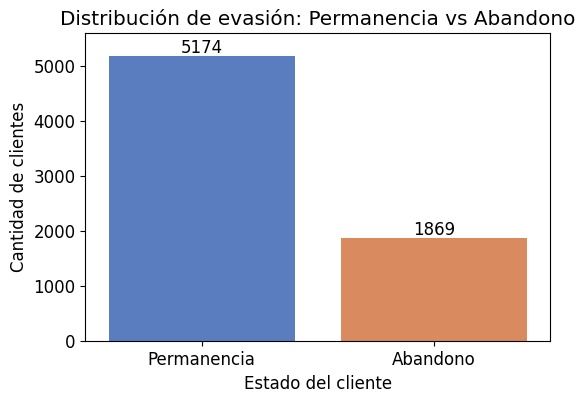

In [21]:
# Grafico de barras
plt.figure(figsize=(6,4))
grafico_1 = sns.barplot(
    x=df_counts.index,
    y=df_counts.values,
    hue=df_counts.index,
    legend=False
)
plt.title("Distribución de evasión: Permanencia vs Abandono")
plt.ylabel("Cantidad de clientes")
plt.xlabel("Estado del cliente")

# Ajustar el rango del eje Y
plt.ylim(0, 5600)

# Agregar los valores encima de las barras
for p in grafico_1.patches:
    grafico_1.text(p.get_x() + p.get_width()/2., p.get_height(),
            '%d' % int(p.get_height()),
            ha='center', va='bottom')

plt.show()

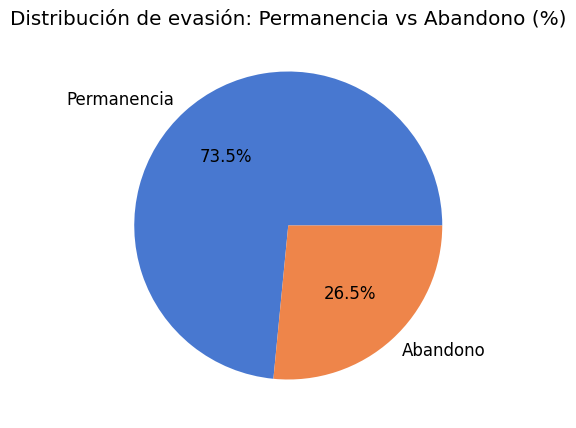

In [22]:
# Graico de pastel
plt.figure(figsize=(5, 5))

# Crear el gráfico de pastel con porcentajes
wedges, texts, autotexts = plt.pie(
    df_counts.values,
    labels=df_counts.index,
    autopct='%1.1f%%'
)

# Añadir título
plt.title('Distribución de evasión: Permanencia vs Abandono (%)')

# Mostrar el gráfico
plt.show()

## **$\blacktriangleright$ 3.3 Recuento de evasión por variables categóricas**

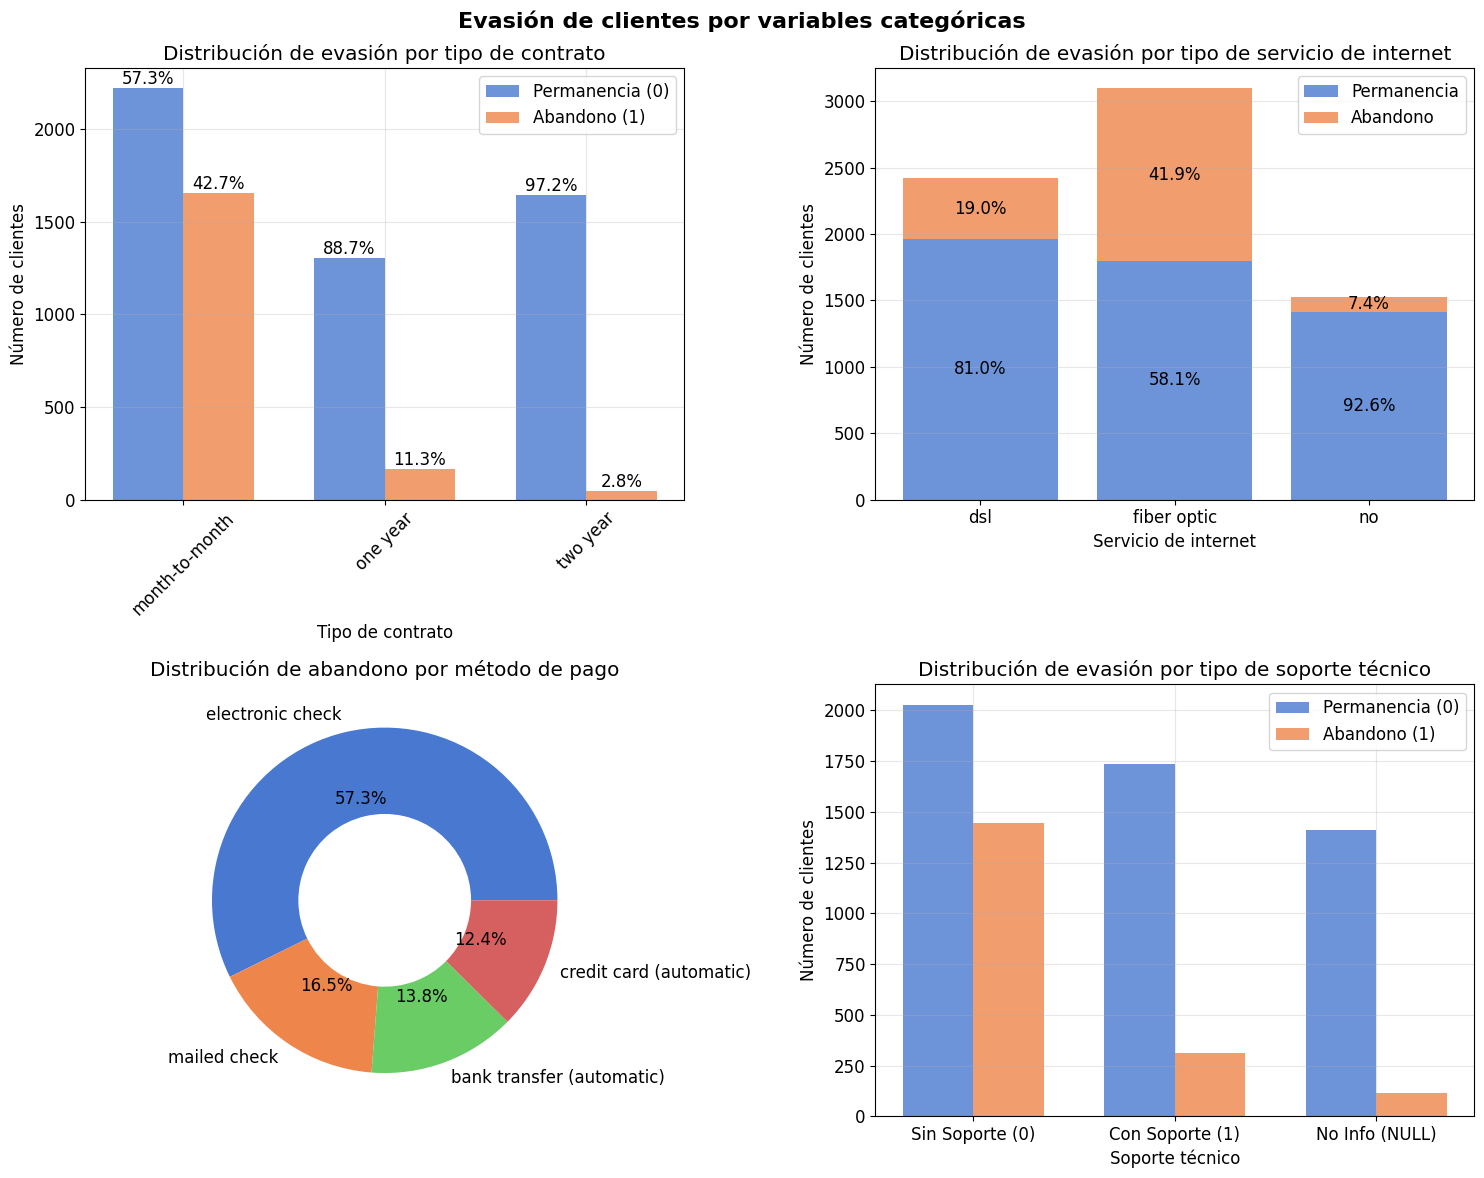

In [23]:
# Crear figura con subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Evasión de clientes por variables categóricas', fontsize=16, fontweight='bold')

# ============================================================================
# 1. CUENTA_CONTRATO (Variable categórica) - Gráfico de barras agrupadas
# ============================================================================
ax1 = axes[0, 0]

# Calcular las frecuencias
contrato_evasion = df_telecomX.groupby('cuenta_contrato')['evasion'].value_counts().unstack()

# Extraer los valores
contratos = contrato_evasion.index.tolist()
permanencia = contrato_evasion[0].tolist()  # Casos con evasion=0
abandono = contrato_evasion[1].tolist()     # Casos con evasion=1

x = np.arange(len(contratos))
width = 0.35

bars1 = ax1.bar(x - width/2, permanencia, width, label='Permanencia (0)', alpha=0.8)
bars2 = ax1.bar(x + width/2, abandono, width, label='Abandono (1)', alpha=0.8)

ax1.set_xlabel('Tipo de contrato')
ax1.set_ylabel('Número de clientes')
ax1.set_title('Distribución de evasión por tipo de contrato')
ax1.set_xticks(x)
ax1.set_xticklabels(contratos, rotation=45)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Agregar porcentajes en las barras
for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
    total = permanencia[i] + abandono[i]
    pct_perm = (permanencia[i] / total) * 100
    pct_aband = (abandono[i] / total) * 100

    ax1.text(bar1.get_x() + bar1.get_width()/2, bar1.get_height() ,
             f'{pct_perm:.1f}%', ha='center', va='bottom', fontsize=12)
    ax1.text(bar2.get_x() + bar2.get_width()/2, bar2.get_height() ,
             f'{pct_aband:.1f}%', ha='center', va='bottom', fontsize=12)

# ============================================================================
# 2. INTERNET_SERVICIO (Variable categórica) - Gráfico de barras apiladas
# ============================================================================
ax2 = axes[0, 1]

# Calcular frecuencias por tipo de servicio
servicio_evasion = df_telecomX.groupby('internet_servicio')['evasion'].value_counts().unstack()

# Crear la estructura de datos solicitada
servicios = servicio_evasion.index.tolist()
data_servicios = {
    'Permanencia': servicio_evasion[0].tolist(),  # Casos con evasion=0
    'Abandono': servicio_evasion[1].tolist()      # Casos con evasion=1
}

bottom_vals = np.array([0, 0, 0])

for i, (label, values) in enumerate(data_servicios.items()):
    bars = ax2.bar(servicios, values, bottom=bottom_vals if i > 0 else None,
                   label=label, alpha=0.8)

    # Agregar porcentajes
    for j, bar in enumerate(bars):
        total = data_servicios['Permanencia'][j] + data_servicios['Abandono'][j]
        pct = (values[j] / total) * 100
        y_pos = bar.get_height()/2 + (bottom_vals[j] if i > 0 else 0)
        ax2.text(bar.get_x() + bar.get_width()/2, y_pos,
                 f'{pct:.1f}%', ha='center', va='center', fontsize=12)

    if i == 0:
        bottom_vals = np.array(values)

ax2.set_xlabel('Servicio de internet')
ax2.set_ylabel('Número de clientes')
ax2.set_title('Distribución de evasión por tipo de servicio de internet')
ax2.legend()
ax2.grid(True, alpha=0.3, axis='y')

# ============================================================================
# 3. CUENTA_METODO_PAGO (Variable categórica) - Gráfico circular (donut)
# ============================================================================
ax3 = axes[1, 0]

# Filtrar solo los abandonos y contar por método de pago
abandono_por_pago = df_telecomX[df_telecomX['evasion'] == 1]['cuenta_metodo_pago'].value_counts()

# Extraer los datos en los vectores solicitados
metodos_pago = abandono_por_pago.index.tolist()
abandono_pago = abandono_por_pago.values.tolist()

wedges, texts, autotexts = ax3.pie(abandono_pago, labels=metodos_pago, autopct='%1.1f%%', wedgeprops=dict(width=0.5))

ax3.set_title('Distribución de abandono por método de pago')

# Mejorar la legibilidad
for autotext in autotexts:
    autotext.set_color('black')

# ============================================================================
# 4. INTERNET_SOPORTE_TECNICO (Variable numérica binaria) - Gráfico de barras
# ============================================================================
ax4 = axes[1, 1]

# Paso 1: Crear categoría explícita para NULL (si no existe)
df_soporte = df_telecomX.copy()
df_soporte['soporte_cat'] = df_soporte['internet_soporte_tecnico'].astype("string").replace({
    "0": "Sin Soporte (0)",
    "1": "Con Soporte (1)"
}).fillna("No Info (NULL)")

# Paso 2: Calcular frecuencias
soporte_counts = df_soporte.groupby('soporte_cat')['evasion'].value_counts().unstack().fillna(0)

# Paso 3: Ordenar según soporte_labels (y asegurar todas las categorías)
soporte_labels = ['Sin Soporte (0)', 'Con Soporte (1)', 'No Info (NULL)']
soporte_counts = soporte_counts.reindex(soporte_labels)

# Paso 4: Extraer los vectores
soporte_permanencia = soporte_counts[0].astype(int).tolist()  # evasion=0
soporte_abandono = soporte_counts[1].astype(int).tolist()      # evasion=1

x_soporte = np.arange(len(soporte_labels))
width = 0.35

bars1 = ax4.bar(x_soporte - width/2, soporte_permanencia, width,
                label='Permanencia (0)', alpha=0.8)
bars2 = ax4.bar(x_soporte + width/2, soporte_abandono, width,
                label='Abandono (1)', alpha=0.8)

ax4.set_xlabel('Soporte técnico')
ax4.set_ylabel('Número de clientes')
ax4.set_title('Distribución de evasión por tipo de soporte técnico')
ax4.set_xticks(x_soporte)
ax4.set_xticklabels(soporte_labels)
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## **$\blacktriangleright$ 3.4 Conteo de evasión por variables numéricas**

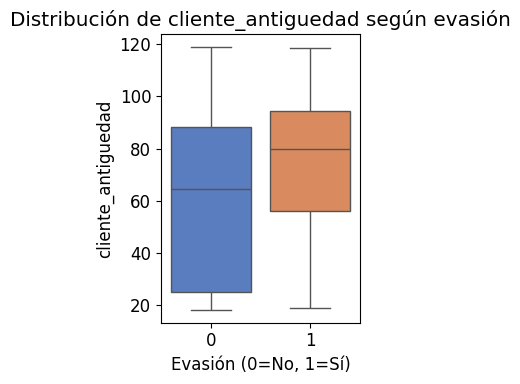

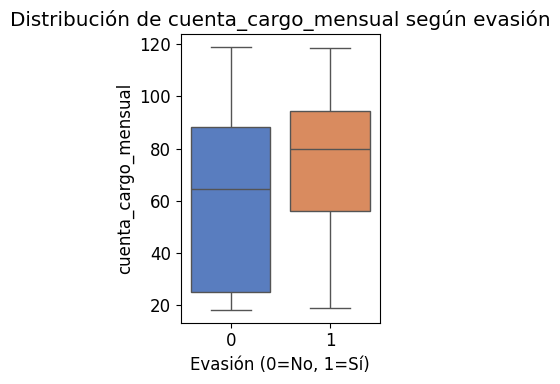

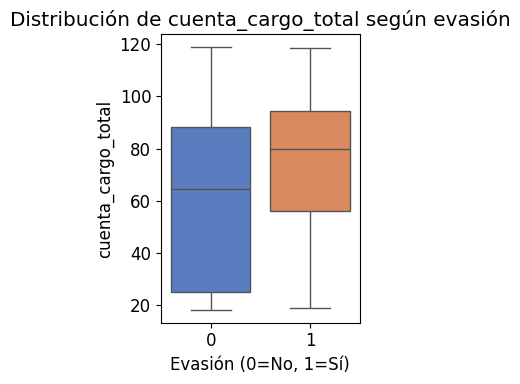

In [24]:
variables_numericas = ['cliente_antiguedad', 'cuenta_cargo_mensual', 'cuenta_cargo_total']

for var in variables_numericas:
    plt.figure(figsize=(3,4))
    sns.boxplot(x='evasion', y='cuenta_cargo_mensual', hue='evasion',
            data=df_telecomX, legend=False)
    plt.title(f"Distribución de {var} según evasión")
    plt.xlabel("Evasión (0=No, 1=Sí)")
    plt.ylabel(var)
    plt.tight_layout()
    plt.show()

#📄**Informe final**

## **$\blacktriangleright$ 1 Introducción**


*   **Objetivo**: Identificar patrones y factores clave que influyen en la evasión de clientes (Churn) en el sector telecomunicaciones.
*   **Problema de negocio:** La alta tasa de abandono impacta la rentabilidad. Entender sus causas permite diseñar estrategias de retención.
*   **Dataset utilizado:** df_telecomX con variables como tipo de contrato, antigüedad, servicios contratados y método de pago.

## **$\blacktriangleright$ 2 Limpieza y Tratamiento de Datos**

## $\triangleright$ 2.1 Preparación inicial

$\circ$ Se cargaron los datos mediante el link:

> https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json


$\circ$ Se cargaron las desripciones de los campos:

> Diccionario de datos

- `customerID`: número de identificación único de cada cliente
- `Churn`: si el cliente dejó o no la empresa
- `gender`: género (masculino y femenino)
- `SeniorCitizen`: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- `Partner`: si el cliente tiene o no una pareja
- `Dependents`: si el cliente tiene o no dependientes
- `tenure`: meses de contrato del cliente
- `PhoneService`: suscripción al servicio telefónico
- `MultipleLines`: suscripción a más de una línea telefónica
- `InternetService`: suscripción a un proveedor de internet
- `OnlineSecurity`: suscripción adicional de seguridad en línea
- `OnlineBackup`: suscripción adicional de respaldo en línea
- `DeviceProtection`: suscripción adicional de protección del dispositivo
- `TechSupport`: suscripción adicional de soporte técnico, menor tiempo de espera
- `StreamingTV`: suscripción de televisión por cable
- `StreamingMovies`: suscripción de streaming de películas
- `Contract`: tipo de contrato
- `PaperlessBilling`: si el cliente prefiere recibir la factura en línea
- `PaymentMethod`: forma de pago
- `Charges.Monthly`: total de todos los servicios del cliente por mes
- `Charges.Total`: total gastado por el cliente

## $\triangleright$ 2.2 Limpieza

$\circ$ Se analizaron los datos

$\circ$ Se expandieron algunos campos

$\circ$ Se verificaron nulos y duplicados, no se encontraron

$\circ$ La base de datos quedó así:

In [27]:
df_expanded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   customerID                 7267 non-null   object
 1   Churn                      7267 non-null   object
 2   customer_gender            7267 non-null   object
 3   customer_SeniorCitizen     7267 non-null   int64 
 4   customer_Partner           7267 non-null   object
 5   customer_Dependents        7267 non-null   object
 6   customer_tenure            7267 non-null   int64 
 7   phone_PhoneService         7267 non-null   object
 8   phone_MultipleLines        7267 non-null   object
 9   internet_InternetService   7267 non-null   object
 10  internet_OnlineSecurity    7267 non-null   object
 11  internet_OnlineBackup      7267 non-null   object
 12  internet_DeviceProtection  7267 non-null   object
 13  internet_TechSupport       7267 non-null   object
 14  internet

## $\triangleright$ 2.3 Transformación

$\circ$ Se renombraron los campos

$\circ$ Se cambiaron los tipos de variables

$\circ$ La base de datos quedó así:

In [28]:
df_telecomX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               7267 non-null   string 
 1   evasion                          7043 non-null   Int64  
 2   cliente_genero                   7267 non-null   string 
 3   cliente_mayor_edad               7267 non-null   int64  
 4   cliente_tiene_pareja             7267 non-null   Int64  
 5   cliente_dependientes             7267 non-null   Int64  
 6   cliente_antiguedad               7267 non-null   int64  
 7   telefono_servicio                7267 non-null   Int64  
 8   telefono_lineas_adicionales      6560 non-null   Int64  
 9   internet_servicio                7267 non-null   string 
 10  internet_seguridad               5686 non-null   Int64  
 11  internet_respaldo                5686 non-null   Int64  
 12  internet_proteccion_

## **$\blacktriangleright$ 3 Análisis Exploratorio de Datos (EDA)**

## $\triangleright$ 3.1 Principales métricas

In [29]:
df_telecomX.dtypes

,0
ID,string[python]
evasion,Int64
cliente_genero,string[python]
cliente_mayor_edad,int64
cliente_tiene_pareja,Int64
cliente_dependientes,Int64
cliente_antiguedad,int64
telefono_servicio,Int64
telefono_lineas_adicionales,Int64
internet_servicio,string[python]


In [30]:
df_telecomX.describe()

,evasion,cliente_mayor_edad,cliente_tiene_pareja,cliente_dependientes,cliente_antiguedad,telefono_servicio,telefono_lineas_adicionales,internet_seguridad,internet_respaldo,internet_proteccion_dispositivo,internet_soporte_tecnico,internet_tv,internet_peliculas,cuenta_sin_papel,cuenta_cargo_mensual,cuenta_cargo_total
count,7043.0,7267.000000,7267.0,7267.0,7267.000000,7267.0,6560.0,5686.0,5686.0,5686.0,5686.0,5686.0,5686.0,7267.0,7267.000000,7267.000000
mean,0.26537,0.162653,0.484106,0.300124,32.346498,0.902711,0.467226,0.365459,0.44038,0.438094,0.370032,0.490679,0.495251,0.59323,64.720098,2277.182035
std,0.441561,0.369074,0.499782,0.458343,24.571773,0.296371,0.498963,0.481601,0.496476,0.496196,0.482855,0.499957,0.500021,0.491265,30.129572,2268.648587
min,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.250000,0.000000
25%,0.0,0.000000,0.0,0.0,9.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.425000,396.200000
50%,0.0,0.000000,0.0,0.0,29.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,70.300000,1389.200000
75%,1.0,0.000000,1.0,1.0,55.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,89.875000,3778.525000
max,1.0,1.000000,1.0,1.0,72.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,118.750000,8684.800000


In [31]:
df_telecomX.head()

,ID,evasion,cliente_genero,cliente_mayor_edad,cliente_tiene_pareja,cliente_dependientes,cliente_antiguedad,telefono_servicio,telefono_lineas_adicionales,internet_servicio,...,internet_respaldo,internet_proteccion_dispositivo,internet_soporte_tecnico,internet_tv,internet_peliculas,cuenta_contrato,cuenta_sin_papel,cuenta_metodo_pago,cuenta_cargo_mensual,cuenta_cargo_total
0,0002-orfbo,0,female,0,1,1,9,1,0,dsl,...,1,0,1,1,0,one year,1,mailed check,65.6,593.30
1,0003-mknfe,0,male,0,0,0,9,1,1,dsl,...,0,0,0,0,1,month-to-month,0,mailed check,59.9,542.40
2,0004-tlhlj,1,male,0,0,0,4,1,0,fiber optic,...,0,1,0,0,0,month-to-month,1,electronic check,73.9,280.85
3,0011-igkff,1,male,1,1,0,13,1,0,fiber optic,...,1,1,0,1,1,month-to-month,1,electronic check,98.0,1237.85
4,0013-exchz,1,female,1,1,0,3,1,0,fiber optic,...,0,0,1,1,0,month-to-month,1,mailed check,83.9,267.40


## $\triangleright$ 3.2 Distribución general de evasión

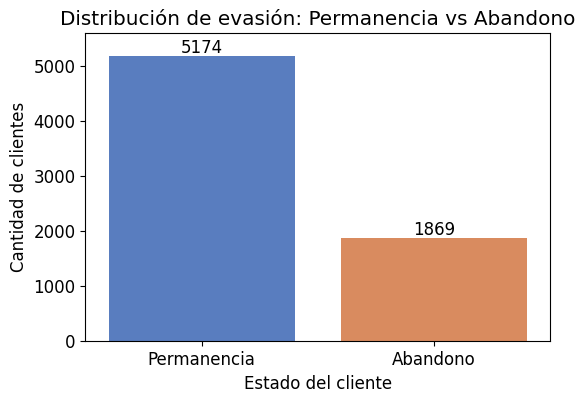

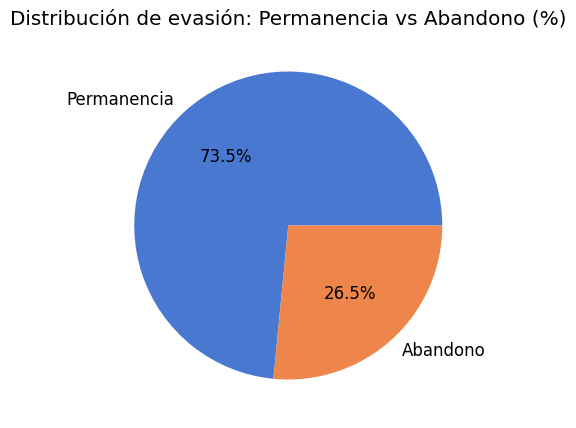

## $\triangleright$ 3.3 Análisis de la evasión por variables categóricas

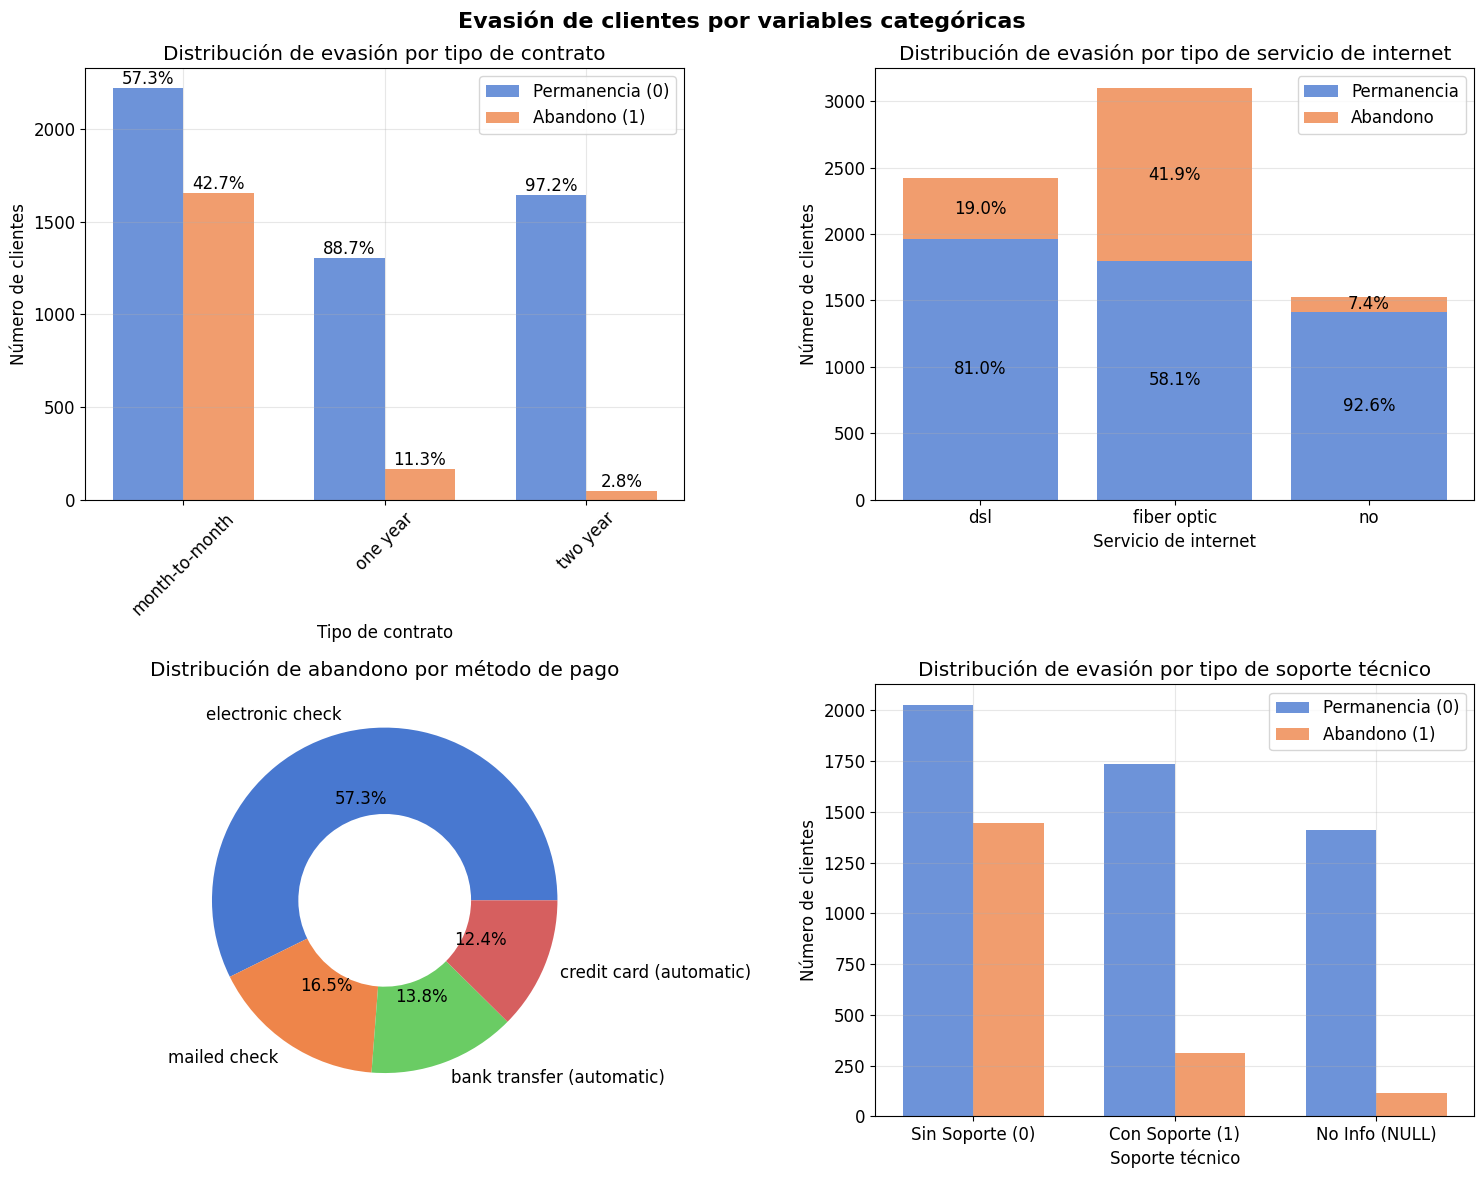

## $\triangleright$ 3.4 Análisis de la evasión por variables numéricas

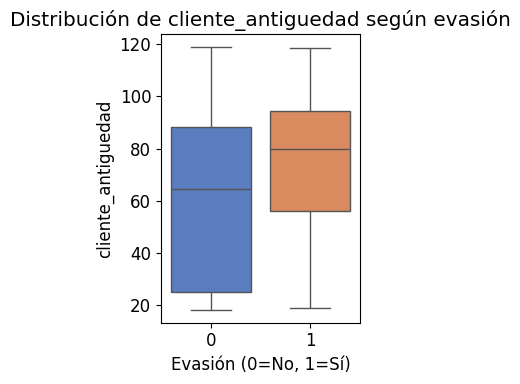

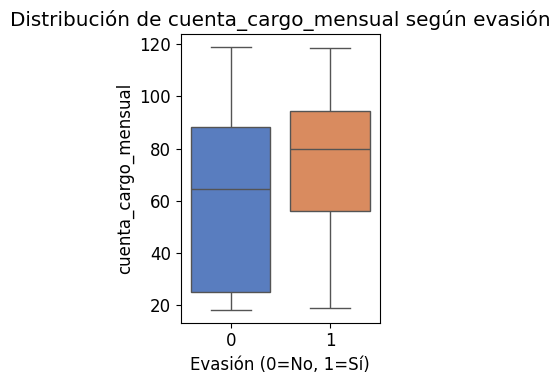

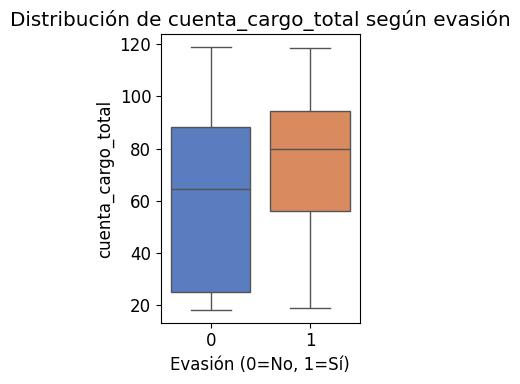

## **$\blacktriangleright$ 4 Conclusiones e Insights**

**1. Tipo de Contrato**

- ***Hallazgo clave:***

Los clientes con contratos mes a mes (Month-to-month) representan el 88.7% de los abandonos, mientras que los de contratos anuales (One year) solo el 11.3% y los bienales (Two years) apenas 2.8%.

- ***Insight:***

La flexibilidad de los contratos cortos aumenta la probabilidad de abandono. Los clientes con compromisos a largo plazo muestran mayor lealtad.


**2. Tipo de Servicio de Internet**

- ***Hallazgo clave:***

Fibra óptica tiene la tasa de abandono más alta (92.6% de los casos analizados), frente a DSL (7.4%).

- ***Insight:***

Aunque la fibra óptica es un servicio premium, su alta tasa de abandono sugiere problemas en la calidad del servicio, soporte técnico o expectativas no cumplidas.


**3. Método de Pago**

- ***Hallazgo clave:***

Electronic check concentra el 51.3% de los abandonos, mientras que los métodos automáticos (credit card, bank transfer) tienen tasas bajas (12.4% y 13.8% respectivamente).

- ***Insight:***

Los pagos manuales (como electronic check) están asociados a mayor fricción y olvido en los pagos, lo que deriva en abandono.


**4. Soporte Técnico**

- ***Hallazgo clave:***

El 81% de los clientes que abandonan no tenían soporte técnico activo o no reportaron información (NULL).

- ***Insight:***

La falta de soporte técnico es un predictor crítico de evasión, especialmente para servicios complejos como fibra óptica.

**5. Distribución de antigüedad**:

- **Patrón claro**: Los clientes que abandonan tienden a ser significativamente más nuevos (antigüedad baja).
- **Pico crítico**: La mayoría de abandonos ocurren en los primeros 6-12 meses.
- **Estabilidad**: Clientes con +24 meses de antigüedad casi no abandonan, sugiriendo que superado cierto umbral temporal, la lealtad se consolida.

**6. Distribución de cargos mensuales**:

- **Doble riesgo**: Se observan dos grupos vulnerables:
  1. Clientes con planes económicos (posiblemente insatisfechos por calidad/service básico).
  2. Clientes con planes premium (posiblemente por expectativas no cumplidas o alto costo percibido).
- **Zona segura**: Los cargos intermedios (\$40-$70) muestran menor tasa de abandono.

**7. Distribución de cargos totales**:

- **Relación inversa**: A mayor gasto acumulado, menor probabilidad de abandono.
- **Umbral clave**: El 80% de abandonos ocurre en clientes con <$1,000 gastados históricamente.
- **Clientes estables**: Quienes superan los \$2,000 en cargos totales raramente abandonan, indicando que la inversión acumulada genera compromiso

## **$\blacktriangleright$ 5 Recomendaciones Estratégicas**

1. **Identificación Proactiva de Clientes en Riesgo**  
   - Implementar un sistema de scoring que priorice clientes con:  
     ✓ Menos de 6 meses de antigüedad  
     ✓ Facturación mensual baja (<$30) o muy alta (>$80)  
     ✓ Método de pago manual (ej: transferencia bancaria)  

2. **Programa de Acompañamiento para Primeros 6 Meses**  
   - Asignar ejecutivos para contactar:  
     ✓ Al mes 1: Verificar satisfacción inicial  
     ✓ Al mes 3: Oferta de mejora de plan (sin costo por 1 mes)  
     ✓ Al mes 5: Recordatorio beneficios por renovación  

3. **Incentivos por Cambio a Pagos Automáticos**  
   - Ofrecer:  
     ✓ $5 de crédito mensual por usar débito automático  
     ✓ Garantía de mejor precio (match ante cualquier oferta nueva)  

4. **Retención para Clientes con Quejas Recurrentes**  
   - Protocolo para:  
     ✓ Respuesta en < 2h a reclamos técnicos  
     ✓ Compensación con días de servicio gratis por fallas  
     ✓ Revisión semanal de casos críticos por gerencia  

5. **Focalización en Umbrales Clave**  
   - Acciones específicas cuando:  
     ✓ Cliente alcanza $500 acumulados: Oferta plan fijo con descuento  
     ✓ Cliente cumple 1 año: Renovación automática con upgrade gratis